In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
#from tpot import TPOTClassifier
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=6b328ea93d27ec229c2a74aafef98c06fc74d2bf7a1954a1bc62c6c777b937a0
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

from tpot import TPOTClassifier
from google.colab import files
uploaded = files.upload()
import io
train_df = pd.read_csv(io.BytesIO(uploaded['esgaml4.csv']))


Saving esgaml4.csv to esgaml4.csv


In [ ]:
train_df.describe()

,Telecommunications,Utilities,Consumer products,Energy,Plantations,ESG-rated year,ROA,ROE,MV,ESG,DV,Size,Growth,Leverage,GovOwn,FamilyOwn
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,0.162162,0.108108,0.216216,0.108108,0.108108,2016.500000,4.345661,0.163548,10.025864,47.072351,0.483784,23.454626,0.048136,104.695107,0.351351,0.227027
std,0.369099,0.310937,0.412221,0.310937,0.310937,2.876171,7.664738,0.485983,0.526318,17.774995,0.500414,1.083092,0.251314,129.248924,0.478039,0.419477
min,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,-46.785212,-3.320820,8.327546,3.250000,0.000000,16.071455,-0.723922,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.425429,0.039782,9.725102,36.137500,0.000000,22.859456,-0.051334,33.821841,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2016.500000,4.321740,0.084620,10.065303,48.815000,0.000000,23.632383,0.031222,65.152849,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,7.149299,0.144102,10.437530,60.852500,1.000000,24.045750,0.108590,120.474620,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,50.426778,3.699100,10.902748,86.800000,1.000000,25.930567,2.183938,899.889248,1.000000,1.000000


In [ ]:
from tpot import TPOTClassifier

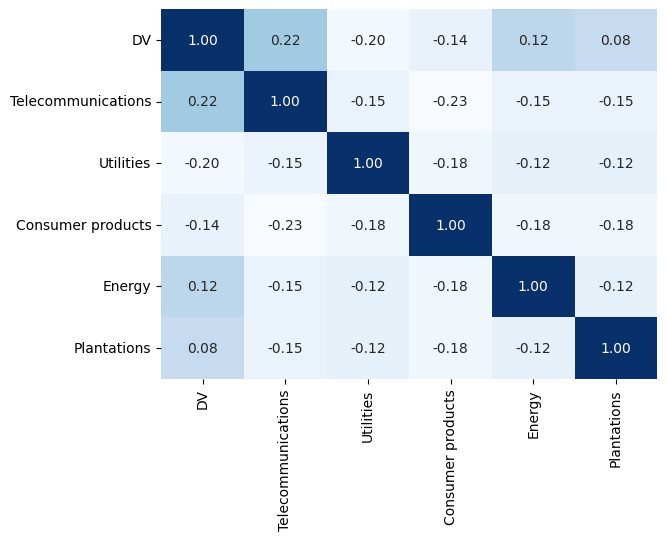

In [ ]:
corr_df = train_df[['DV','Telecommunications', 'Utilities', 'Consumer products','Energy','Plantations']]

# calculate the correlation matrix
corr_matrix = corr_df.corr()

sns.heatmap(corr_df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.2f');

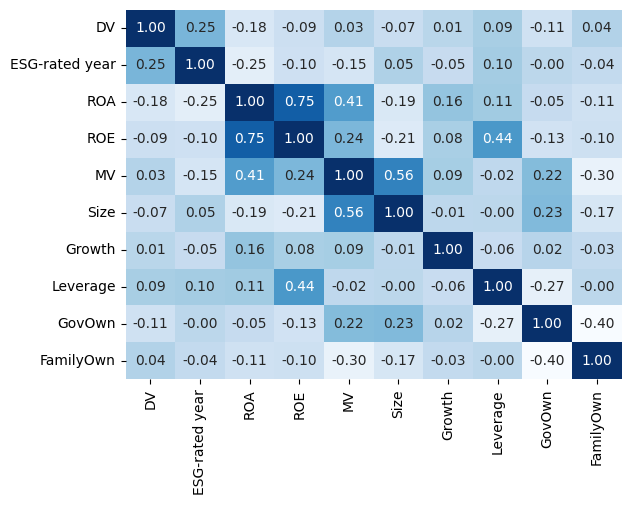

In [ ]:
corr_df = train_df[['DV','ESG-rated year','ROA', 'ROE', 'MV','Size','Growth','Leverage','GovOwn','FamilyOwn']]

# calculate the correlation matrix
corr_matrix = corr_df.corr()

sns.heatmap(corr_df.corr(),annot=True, cbar=False, cmap='Blues', fmt='.2f');

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Load and preprocess your ESG dataset as X and y
# Replace X and y with your feature matrix and target variable
X_train = train_df.drop(["DV","ESG",'ESG-rated year','ROA', 'ROE', 'MV','Size','Growth','Leverage','GovOwn','FamilyOwn'], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)

# Initialize the Random Forest classifier
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#60, 7
rf_classifier = RandomForestClassifier(n_estimators=60, max_depth=7, random_state=42)#
rf_classifier.fit(Feature_Train, Class_Train)
#print(rf_classifier.score(Feature_Test, Class_Test))

# Perform 5-fold cross-validation
scores = cross_val_score(rf_classifier, Feature_Test, Class_Test, cv=5)

# Print the validation scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Validation Score (Fold {fold}): {score:.2f}")

# Calculate mean accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f"Random Forest Mean Accuracy (5-fold CV): {mean_accuracy:.2f}")




Validation Score (Fold 1): 0.70
Validation Score (Fold 2): 0.68
Validation Score (Fold 3): 0.68
Validation Score (Fold 4): 0.59
Validation Score (Fold 5): 0.50
Random Forest Mean Accuracy (5-fold CV): 0.63


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Load and preprocess your ESG dataset as X and y
# Replace X and y with your feature matrix and target variable
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)

# Initialize the Random Forest classifier
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#60, 7
rf_classifier = RandomForestClassifier(n_estimators=60, max_depth=7, random_state=42)#
rf_classifier.fit(Feature_Train, Class_Train)
#print(rf_classifier.score(Feature_Test, Class_Test))

# Perform 5-fold cross-validation
scores = cross_val_score(rf_classifier, Feature_Test, Class_Test, cv=5)

# Print the validation scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Validation Score (Fold {fold}): {score:.2f}")

# Calculate mean accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f"Random Forest Mean Accuracy (5-fold CV): {mean_accuracy:.2f}")

Validation Score (Fold 1): 0.78
Validation Score (Fold 2): 0.77
Validation Score (Fold 3): 0.50
Validation Score (Fold 4): 0.59
Validation Score (Fold 5): 0.68
Random Forest Mean Accuracy (5-fold CV): 0.67


In [ ]:

# Load and preprocess your ESG dataset as X and y
# Replace X and y with your feature matrix and target variable
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)

# Initialize the Random Forest classifier

#7 =0..58
#rf_classifier = RandomForestClassifier(n_estimators=60, max_depth=7, random_state=42)#
dt_classifier = DecisionTreeClassifier(max_depth=7,random_state=42)
dt_classifier.fit(Feature_Train, Class_Train)
#print(dt_classifier.score(Feature_Test, Class_Test))

# Perform 5-fold cross-validation
scores = cross_val_score(dt_classifier, Feature_Test, Class_Test, cv=5)

# Print the validation scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Validation Score (Fold {fold}): {score:.2f}")

# Calculate mean accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f"Random Forest Mean Accuracy (5-fold CV): {mean_accuracy:.2f}")

Validation Score (Fold 1): 0.70
Validation Score (Fold 2): 0.77
Validation Score (Fold 3): 0.59
Validation Score (Fold 4): 0.55
Validation Score (Fold 5): 0.45
Random Forest Mean Accuracy (5-fold CV): 0.61


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# Load and preprocess your ESG dataset as X and y
# Replace X and y with your feature matrix and target variable
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)

xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(Feature_Train, Class_Train)
#print(rf_classifier.score(Feature_Test, Class_Test))

# Perform 5-fold cross-validation
scores = cross_val_score(xgb_classifier, Feature_Test, Class_Test, cv=5)

# Print the validation scores for each fold
for fold, score in enumerate(scores, start=1):
    print(f"Validation Score (Fold {fold}): {score:.2f}")

# Calculate mean accuracy from cross-validation
mean_accuracy = np.mean(scores)
print(f"Random Forest Mean Accuracy (5-fold CV): {mean_accuracy:.2f}")

Validation Score (Fold 1): 0.61
Validation Score (Fold 2): 0.82
Validation Score (Fold 3): 0.50
Validation Score (Fold 4): 0.59
Validation Score (Fold 5): 0.50
Random Forest Mean Accuracy (5-fold CV): 0.60


In [ ]:
from sklearn.metrics import roc_auc_score

# Fit the classifier on the training data
rf_classifier.fit(Feature_Train, Class_Train)

# Predict probabilities for the positive class
y_proba = rf_classifier.predict_proba(Feature_Test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(Class_Test, y_proba)
print(f"Random Forest AUC Score (Testing): {auc_score:.2f}")

Random Forest AUC Score (Testing): 0.85


In [ ]:
# Fit the classifier on the training data
xgb_classifier.fit(Feature_Train, Class_Train)

# Predict probabilities for the positive class
y_proba = xgb_classifier.predict_proba(Feature_Test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(Class_Test, y_proba)
print(f"Random Forest AUC Score (Testing): {auc_score:.2f}")

Random Forest AUC Score (Testing): 0.86


In [ ]:
from sklearn.metrics import roc_auc_score

# Fit the classifier on the training data
rf_classifier.fit(Feature_Train, Class_Train)

# Predict probabilities for the positive class
y_proba = rf_classifier.predict_proba(Feature_Test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(Class_Test, y_proba)
print(f"Random Forest AUC Score (Testing): {auc_score:.2f}")

Random Forest AUC Score (Testing): 0.87


Optimization Progress:   0%|          | 0/160 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.760633484162896


TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.9500000000000001, min_samples_leaf=1, min_samples_split=12, n_estimators=100)
0.7927927927927928


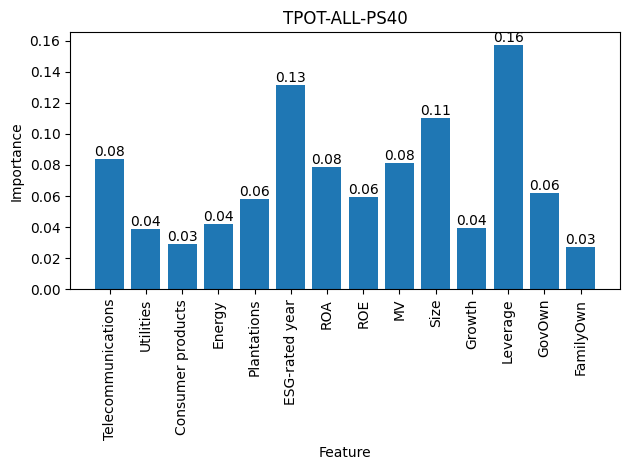

In [ ]:
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)
tpot = TPOTClassifier(generations=3, population_size=40, mutation_rate=0.7,crossover_rate=0.3,verbosity=2, cv=5)
tpot.fit(Feature_Train, Class_Train)
print(tpot.score(Feature_Test, Class_Test))

# Access the feature importances
exctracted_best_model = tpot.fitted_pipeline_.steps[-1][1]

# Plot them using barplot
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)

# Set labels for the x-axis based on your feature names
# Replace 'feature_names' with your actual feature names
feature_names = train_df.drop(["DV", "ESG"], axis=1).columns
#plt.xticks(positions, feature_names, rotation='vertical')

#set labels for the x-axis based on your feature names
plt.xticks(positions, feature_names, rotation='vertical')

# Add feature importance values on top of each bar
for i, importance in enumerate(exctracted_best_model.feature_importances_):
    plt.text(i, importance, f'{importance:.2f}', ha='center', va='bottom')
# Display the plot
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("TPOT-ALL-PS40")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have predictions from TPOT in tpot_predictions (0 or 1)
# Assuming you have predictions from GPLEARN in gplearn_predictions (continuous)

# Convert GPLEARN predictions to binary
#gplearn_predictions_binary = (gplearn_predictions >= 0.5).astype(int)

# Calculate classification accuracy for TPOT predictions
tpot_accuracy = accuracy_score(Feature_Test, Class_Test)

# Calculate classification accuracy for GPLEARN predictions
gplearn_accuracy = accuracy_score(Class_Test, gplearn_predictions_binary)

# Compare the accuracies
print("TPOT Classification Accuracy:", tpot_accuracy)
print("GPLEARN Classification Accuracy:", gplearn_accuracy)


ValueError: ignored

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8184766214177979

Generation 2 - Current best internal CV score: 0.8184766214177979

Generation 3 - Current best internal CV score: 0.8263951734539969

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.2, min_samples_leaf=1, min_samples_split=6, n_estimators=100)
0.7747747747747747


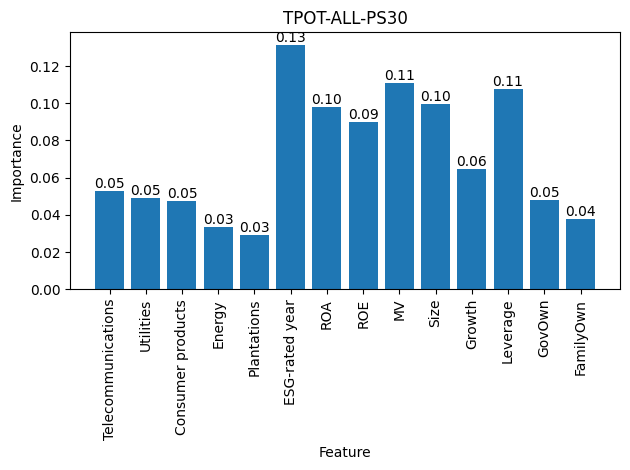

In [ ]:
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)
tpot1 = TPOTClassifier(generations=3, population_size=30, mutation_rate=0.7,crossover_rate=0.3,verbosity=2, cv=5)
tpot1.fit(Feature_Train, Class_Train)
print(tpot1.score(Feature_Test, Class_Test))

# Access the feature importances
exctracted_best_model = tpot1.fitted_pipeline_.steps[-1][1]

# Plot them using barplot
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)

# Set labels for the x-axis based on your feature names
# Replace 'feature_names' with your actual feature names
feature_names = train_df.drop(["DV", "ESG"], axis=1).columns
#plt.xticks(positions, feature_names, rotation='vertical')

#set labels for the x-axis based on your feature names
plt.xticks(positions, feature_names, rotation='vertical')

# Add feature importance values on top of each bar
for i, importance in enumerate(exctracted_best_model.feature_importances_):
    plt.text(i, importance, f'{importance:.2f}', ha='center', va='bottom')
# Display the plot
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("TPOT-ALL-PS30")
plt.tight_layout()
plt.show()

Optimization Progress:   0%|          | 0/80 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7527149321266968

Generation 2 - Current best internal CV score: 0.7527149321266968

Generation 3 - Current best internal CV score: 0.7527149321266968

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.05, min_samples_leaf=4, min_samples_split=2, n_estimators=100)
0.7117117117117117


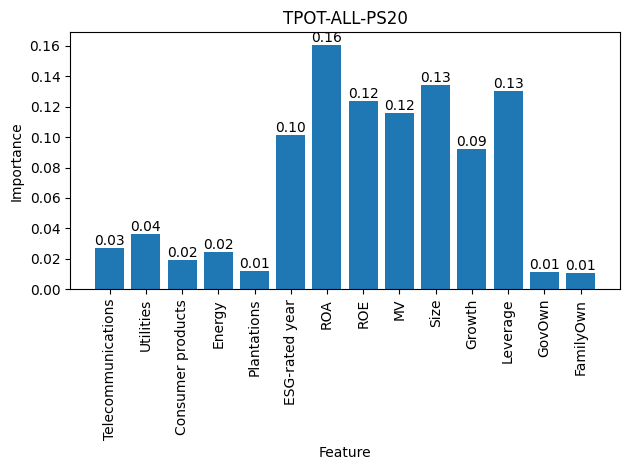

In [ ]:
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)
tpot2 = TPOTClassifier(generations=3, population_size=20, mutation_rate=0.7,crossover_rate=0.3,verbosity=2, cv=5)
tpot2.fit(Feature_Train, Class_Train)
print(tpot2.score(Feature_Test, Class_Test))

# Access the feature importances
exctracted_best_model = tpot2.fitted_pipeline_.steps[-1][1]

# Plot them using barplot
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)

# Set labels for the x-axis based on your feature names
# Replace 'feature_names' with your actual feature names
feature_names = train_df.drop(["DV", "ESG"], axis=1).columns
#plt.xticks(positions, feature_names, rotation='vertical')

#set labels for the x-axis based on your feature names
plt.xticks(positions, feature_names, rotation='vertical')

# Add feature importance values on top of each bar
for i, importance in enumerate(exctracted_best_model.feature_importances_):
    plt.text(i, importance, f'{importance:.2f}', ha='center', va='bottom')
# Display the plot
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("TPOT-ALL-PS20")
plt.tight_layout()
plt.show()

Optimization Progress:   0%|          | 0/40 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.718024132730015

Generation 2 - Current best internal CV score: 0.7374057315233786

Generation 3 - Current best internal CV score: 0.7487933634992459

Best pipeline: ExtraTreesClassifier(StandardScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=2, min_samples_split=4, n_estimators=100)
0.7747747747747747


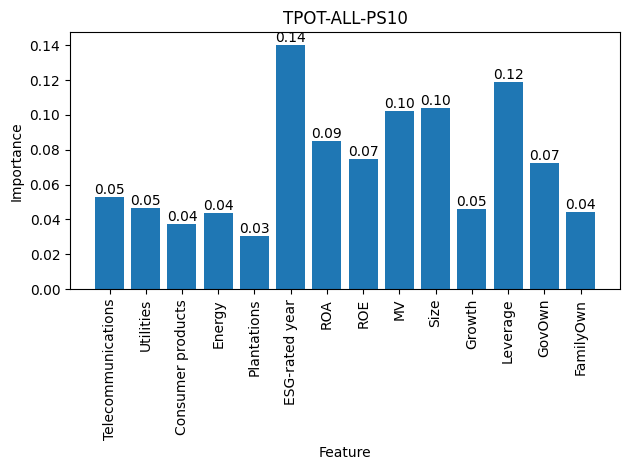

In [ ]:
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)
tpot3 = TPOTClassifier(generations=3, population_size=10, mutation_rate=0.7,crossover_rate=0.3,verbosity=2, cv=5)
tpot3.fit(Feature_Train, Class_Train)
print(tpot3.score(Feature_Test, Class_Test))


# Access the feature importances
exctracted_best_model = tpot3.fitted_pipeline_.steps[-1][1]

# Plot them using barplot
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)

# Set labels for the x-axis based on your feature names
# Replace 'feature_names' with your actual feature names
feature_names = train_df.drop(["DV", "ESG"], axis=1).columns
#plt.xticks(positions, feature_names, rotation='vertical')

#set labels for the x-axis based on your feature names
plt.xticks(positions, feature_names, rotation='vertical')

# Add feature importance values on top of each bar
for i, importance in enumerate(exctracted_best_model.feature_importances_):
    plt.text(i, importance, f'{importance:.2f}', ha='center', va='bottom')
# Display the plot
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("TPOT-ALL-PS10")
plt.tight_layout()
plt.show()

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7721719457013575

Generation 2 - Current best internal CV score: 0.7879336349924585

Generation 3 - Current best internal CV score: 0.7879336349924585

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=10, max_features=0.2, min_samples_leaf=8, min_samples_split=18, n_estimators=100, subsample=0.9000000000000001)
0.8288288288288288


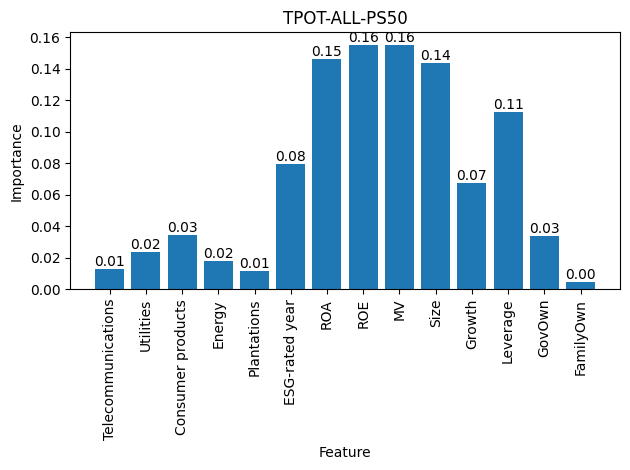

In [ ]:
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)
tpot0 = TPOTClassifier(generations=3, population_size=50, mutation_rate=0.7,crossover_rate=0.3,verbosity=2, cv=5)
tpot0.fit(Feature_Train, Class_Train)
print(tpot0.score(Feature_Test, Class_Test))

# Access the feature importances
exctracted_best_model = tpot0.fitted_pipeline_.steps[-1][1]

# Plot them using barplot
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)

# Set labels for the x-axis based on your feature names
# Replace 'feature_names' with your actual feature names
feature_names = train_df.drop(["DV", "ESG"], axis=1).columns
#plt.xticks(positions, feature_names, rotation='vertical')

#set labels for the x-axis based on your feature names
plt.xticks(positions, feature_names, rotation='vertical')

# Add feature importance values on top of each bar
for i, importance in enumerate(exctracted_best_model.feature_importances_):
    plt.text(i, importance, f'{importance:.2f}', ha='center', va='bottom')
# Display the plot
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("TPOT-ALL-PS50")
plt.tight_layout()
plt.show()

Optimization Progress:   0%|          | 0/400 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8150075414781298

Generation 2 - Current best internal CV score: 0.8150075414781298

Generation 3 - Current best internal CV score: 0.8150075414781298

Best pipeline: ExtraTreesClassifier(PCA(input_matrix, iterated_power=10, svd_solver=randomized), bootstrap=False, criterion=entropy, max_features=0.8500000000000001, min_samples_leaf=7, min_samples_split=19, n_estimators=100)
0.7567567567567568


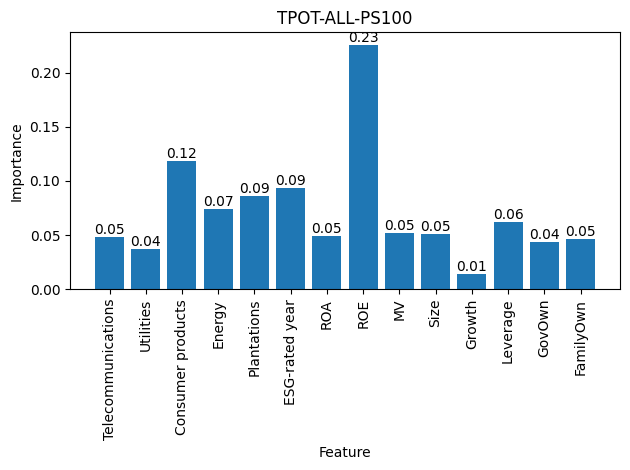

In [ ]:
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)
tpot00 = TPOTClassifier(generations=3, population_size=100, mutation_rate=0.7,crossover_rate=0.3,verbosity=2, cv=5)
tpot00.fit(Feature_Train, Class_Train)
print(tpot00.score(Feature_Test, Class_Test))

# Access the feature importances
exctracted_best_model = tpot00.fitted_pipeline_.steps[-1][1]

# Plot them using barplot
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)

# Set labels for the x-axis based on your feature names
# Replace 'feature_names' with your actual feature names
feature_names = train_df.drop(["DV", "ESG"], axis=1).columns
#plt.xticks(positions, feature_names, rotation='vertical')

#set labels for the x-axis based on your feature names
plt.xticks(positions, feature_names, rotation='vertical')

# Add feature importance values on top of each bar
for i, importance in enumerate(exctracted_best_model.feature_importances_):
    plt.text(i, importance, f'{importance:.2f}', ha='center', va='bottom')
# Display the plot
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("TPOT-ALL-PS100")
plt.tight_layout()
plt.show()

Optimization Progress:   0%|          | 0/800 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7995475113122171

Generation 2 - Current best internal CV score: 0.8071644042232279

Generation 3 - Current best internal CV score: 0.8071644042232279

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=0.45, min_samples_leaf=1, min_samples_split=9, n_estimators=100)
0.7927927927927928


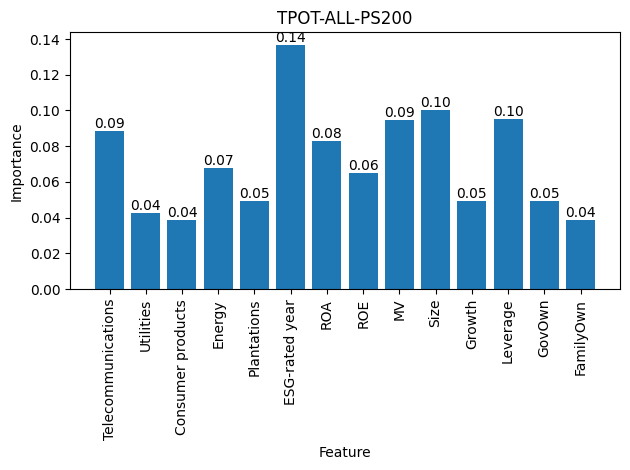

In [ ]:
X_train = train_df.drop(["DV","ESG"], axis=1).values
Y_train = train_df["DV"]
Features = X_train
Class = Y_train
Feature_Train, Feature_Test, Class_Train, Class_Test  = train_test_split(X_train, Y_train, test_size=0.3)
tpot200 = TPOTClassifier(generations=3, population_size=200, mutation_rate=0.7,crossover_rate=0.3,verbosity=2, cv=5)
tpot200.fit(Feature_Train, Class_Train)
print(tpot200.score(Feature_Test, Class_Test))

# Access the feature importances
exctracted_best_model = tpot200.fitted_pipeline_.steps[-1][1]

# Plot them using barplot
positions= range(exctracted_best_model.feature_importances_.shape[0])
plt.bar(positions, exctracted_best_model.feature_importances_)

# Set labels for the x-axis based on your feature names
# Replace 'feature_names' with your actual feature names
feature_names = train_df.drop(["DV", "ESG"], axis=1).columns
#plt.xticks(positions, feature_names, rotation='vertical')

#set labels for the x-axis based on your feature names
plt.xticks(positions, feature_names, rotation='vertical')

# Add feature importance values on top of each bar
for i, importance in enumerate(exctracted_best_model.feature_importances_):
    plt.text(i, importance, f'{importance:.2f}', ha='center', va='bottom')
# Display the plot
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("TPOT-ALL-PS200")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have predictions from TPOT in tpot_predictions (0 or 1)
# Assuming you have predictions from GPLEARN in gplearn_predictions (continuous)

# Convert GPLEARN predictions to binary
gplearn_predictions_binary = (gplearn_predictions >= 0.5).astype(int)

# Calculate classification accuracy for TPOT predictions
tpot_accuracy = accuracy_score(Class_Test, tpot_predictions)

# Calculate classification accuracy for GPLEARN predictions
gplearn_accuracy = accuracy_score(Class_Test, gplearn_predictions_binary)

# Compare the accuracies
print("TPOT Classification Accuracy:", tpot_accuracy)
print("GPLEARN Classification Accuracy:", gplearn_accuracy)

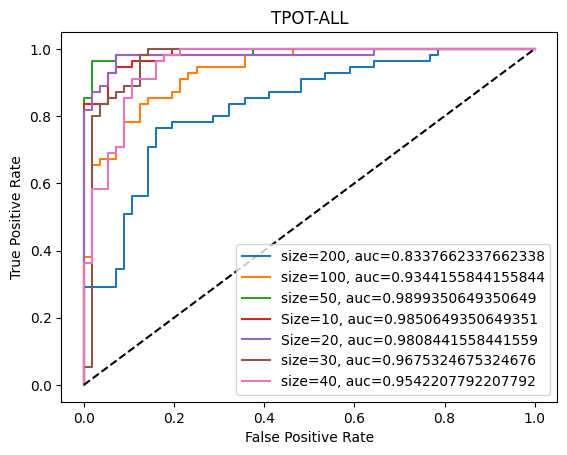

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
plt.figure(0).clf()

pred = tpot200.predict_proba(Feature_Test)[:,1]
fpr, tpr, thresh = roc_curve(Class_Test, pred)
fpr, tpr, thresh = metrics.roc_curve(Class_Test, pred)
auc = metrics.roc_auc_score(Class_Test, pred)
plt.plot(fpr,tpr,label="size=200, auc="+str(auc))

pred = tpot00.predict_proba(Feature_Test)[:,1]
fpr, tpr, thresh = roc_curve(Class_Test, pred)
fpr, tpr, thresh = metrics.roc_curve(Class_Test, pred)
auc = metrics.roc_auc_score(Class_Test, pred)
plt.plot(fpr,tpr,label="size=100, auc="+str(auc))

pred = tpot0.predict_proba(Feature_Test)[:,1]
fpr, tpr, thresh = roc_curve(Class_Test, pred)
fpr, tpr, thresh = metrics.roc_curve(Class_Test, pred)
auc = metrics.roc_auc_score(Class_Test, pred)
plt.plot(fpr,tpr,label="size=50, auc="+str(auc))





pred = tpot.predict_proba(Feature_Test)[:,1]
fpr, tpr, thresh = roc_curve(Class_Test, pred)
fpr, tpr, thresh = metrics.roc_curve(Class_Test, pred)
auc = metrics.roc_auc_score(Class_Test, pred)
plt.plot(fpr,tpr,label="Size=10, auc="+str(auc))


pred = tpot1.predict_proba(Feature_Test)[:,1]
fpr, tpr, thresh = roc_curve(Class_Test, pred)
fpr, tpr, thresh = metrics.roc_curve(Class_Test, pred)
auc = metrics.roc_auc_score(Class_Test, pred)
plt.plot(fpr,tpr,label="Size=20, auc="+str(auc))

pred = tpot2.predict_proba(Feature_Test)[:,1]
fpr, tpr, thresh = roc_curve(Class_Test, pred)
fpr, tpr, thresh = metrics.roc_curve(Class_Test, pred)
auc = metrics.roc_auc_score(Class_Test, pred)
plt.plot(fpr,tpr,label="size=30, auc="+str(auc))

pred = tpot3.predict_proba(Feature_Test)[:,1]
fpr, tpr, thresh = roc_curve(Class_Test, pred)
fpr, tpr, thresh = metrics.roc_curve(Class_Test, pred)
auc = metrics.roc_auc_score(Class_Test, pred)
plt.plot(fpr,tpr,label="size=40, auc="+str(auc))



plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,ls="None")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TPOT-ALL')
plt.legend(loc=0)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define the power-law model function
def power_law(ps, a, b):
    return a * np.power(ps, b)

# Given data
ps = np.array([10, 20, 30, 40, 50, 100, 200])
time_taken = np.array([25, 30, 60, 120, 144, 246, 516])

# Fit the power-law model to the data
params, covariance = curve_fit(power_law, ps, time_taken)

# Extract the estimated parameters
a, b = params

# Print the estimated parameters
print(f"Estimated Parameters: a = {a}, b = {b}")

# Test the model with a new population size
new_ps = 10  # For example, you can test with ps = 60
predicted_time = power_law(new_ps, a, b)
print(f"Predicted Time for ps = {new_ps}: {predicted_time} seconds")


Estimated Parameters: a = 2.408360985370923, b = 1.012697883367695
Predicted Time for ps = 10: 24.798160499891036 seconds
